EC 48E Assignment 2

----


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns

from mizani.formatters import comma_format, date_format
from mizani.breaks import date_breaks

## Conceptual Questions


### 1

#### a

With a large sample size and small number of predictors, **flexible methods work better** than inflexible methods since they can utilize a sample that closely resembling the actual population. Under these conditions, risk of overfitting,which is the main disadvantage of flexible methods, greatly reduced.

#### b

Extremely large number of predictors and small sample size potentially cause overfitting problems for flexible methods. Thus, **inflexible methods work better** than flexible ones since they are less vulnerable for noises in data and overfitting.

#### c

**Flexible methods are better** in capturing highly non-linear relationships with the help of their degree of freedom and being less restricted.

#### d

Under given conditions, **inflexible methods work better** than flexible methods since flexible methods may utilize the noise in error terms as a relationship feature and be vulnerable to overfitting.

### 2

#### a - b

(0.0, 6.0)

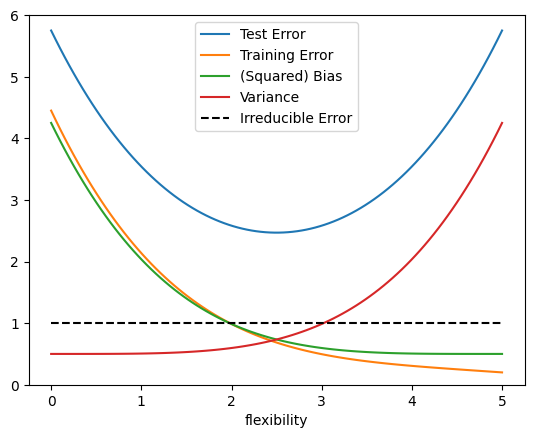

In [ ]:
# the following provides a typical bias-variance tradeoff graph
x = np.linspace(0, 5, 100)
bias = 0.006*(5-x)**4+.5
variance = 0.006*x**4+.5
bayes_error = np.linspace(1, 1, 100)
test_error = bias+variance+bayes_error
train_error = 0.006*(5-x)**4+.5 - .1*(x-2)

plt.plot(x, test_error, label="Test Error")
plt.plot(x, train_error, label="Training Error")
plt.plot(x, bias, label="(Squared) Bias")
plt.plot(x, variance, label="Variance")
plt.plot(x, bayes_error, "k--", label="Irreducible Error")

plt.legend()
plt.xlabel("flexibility")
plt.ylim(0,6)

*   As model gets more flexible, bias squared decreases because the model can identify and utilize more patterns which are basically some noise for inflexible models.
*   As model gets more flexible, variance increases because of overfitting. The model gets pretty fluent in test data and overfit the relations in it, including the data noise. This leads to a interpretation of unseen data with unappropriate noise interpretation and results in higher variance in unseen data predictions.
*   As model gets more flexible, training error decreases because with better capability in data interpretation (more complexity-less restrictions), misinterpretatiton of training data is less likely to occur. However, it can be deceptive because of the risk of overfitting especially for more flexible models.
*   Test error is nothing but the sum of reducible (bias and variance) and irreducible errors and is U-shaped regarding the model complexity. In inflexible/less complex models, test error is high due to the high bias which means that the model consistently mispredicts. In flexible/more complex models, test error is high due to the overfitting. The model now starts interpreting the data vastly and is more prone to interpret data noise too. This tradeoff between bias and variance leads to a U-shaped curve for test error, being high in two edges of complexity spectrum.
*   Irreducible error is the error term that cannot be lessened regarding the complexity level of the model. It is the undetectable, unresolvable, natural error term in the model. So it is constant and has nothing do with the model complexity.



#### c

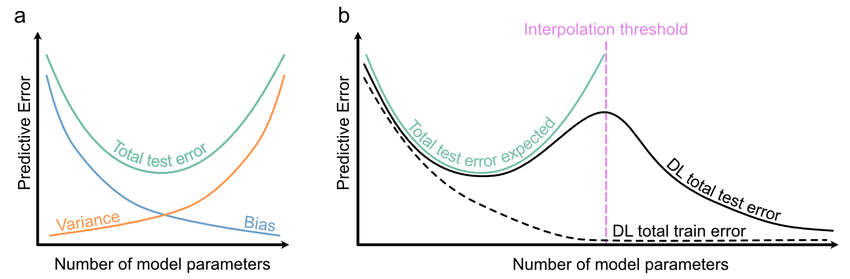

As mentioned in the previous part, the conventional bias-variance tradeoff suggests that test error forms a U-shaped curve (graph a). For less complex models, the error term is high due to a high level of bias. As the model gets more complex and can cope with bias, test error decreases, but beyond a certain point, it starts to increase again because of overfitting and this results in a high error term again.

*Double descent phenomenon* occurs where the test error of a model first decreases, then increases, but then decreases again as the model complexity increases for extremely high levels of complexity (graph b). It turns out that the local minimum from the traditional variance-bias diagram is not global minimum and test error goes down after the number of parameters increases excessively in deep learning methods. In that level of complexity, the model can handle variance hence overfitting but with no cost of bias. This may be due to the interpretation capabilities of highly complex models. They could be able to interpret noise as it is and exclude its relation from other relations in the data. Also, employing an excessive number of parameters could overcome the overfitting problem and provide a fluent model for interpreting the relations in the data, unlike the traditional ways/methods.

Ultimately, double descent shows that exceeding model complexity beyond the point of overfitting may sometimes improve performance and it should be taken into account for building new models or designing data driven solutions. However, it may require hundreds of millions of parameters (e.g.: Large Language Models such as GPT-4 and Gemini use billions of parameters) which means more computational cost and more time to train models.

## Applied Questions

### 3

#### a

In [ ]:
college = pd.read_csv("https://www.statlearning.com/s/College.csv")

#### b

In [ ]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
temp = college.rename({"Unnamed: 0": "College"},axis=1).set_index("College")

In [ ]:
college = temp

#### c

In [ ]:
college.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


It is interesting that PhD column, which represents the percent of faculties with PhD's, somehow exceeds 100%. Graduation rate is also greater than 100% but it is probably gross rate.

In [ ]:
# for categorical variable, Private
college.describe(include="object")

,Private
count,777
unique,2
top,Yes
freq,565


#### d

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

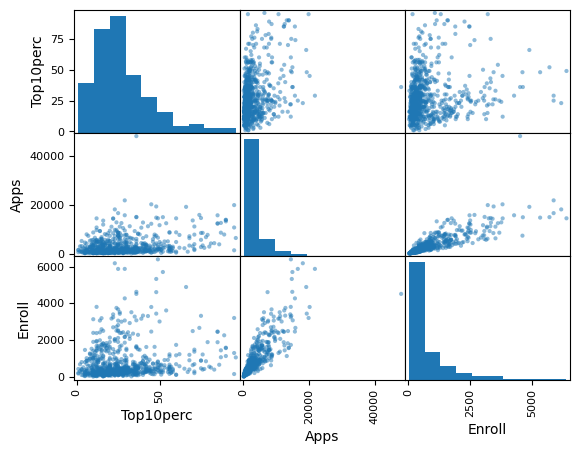

In [ ]:
cols = ["Top10perc", "Apps", "Enroll"]
pd.plotting.scatter_matrix(college[cols])

#### e

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

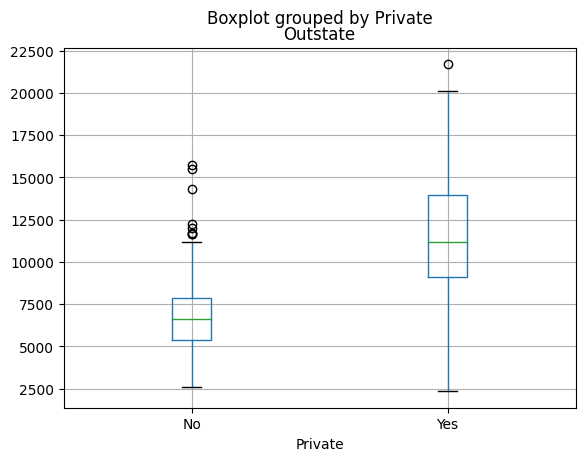

In [ ]:
college.boxplot("Outstate","Private")

#### f

In [ ]:
college["Elite"] = pd.cut(college["Top10perc"],[0,50,100],labels=["No", "Yes"])
college["Elite"].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

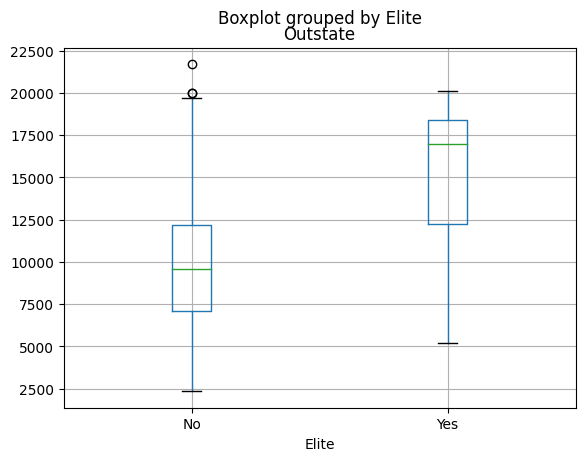

In [ ]:
college.boxplot("Outstate","Elite")

#### g

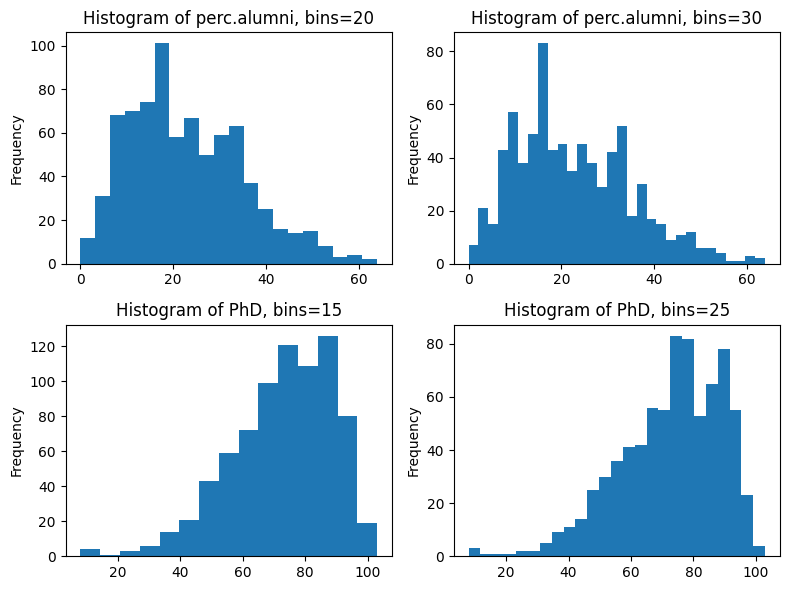

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8,6))
plt.subplot(221)
college["perc.alumni"].plot.hist(bins=20)
plt.title("Histogram of perc.alumni, bins=20")
plt.subplot(222)
college["perc.alumni"].plot.hist(bins=30)
plt.title("Histogram of perc.alumni, bins=30")
plt.subplot(223)
college["PhD"].plot.hist(bins=15)
plt.title("Histogram of PhD, bins=15")
plt.subplot(224)
college["PhD"].plot.hist(bins=25)
plt.title("Histogram of PhD, bins=25")
plt.tight_layout()

### 4

In [ ]:
# In Auto dataset there are some ?'s which represent missing values.
auto = pd.read_csv("https://www.statlearning.com/s/Auto.csv", na_values="?")
auto.dropna(inplace=True)

#### a

In [ ]:
# .info() method can give us a clue as to whether the predictors are quantitative or qualitative
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In general, we treat integer or float type variables as quantitative ones and object type variables as qualitative ones. However, sometimes a qualitative variable may labeled as integer ('origin' in this dataset) or we wish to treat a quantitative variable as a qualitative one because there are only a small number of possible values for that variable ('cylinders').
  * mpg, displacement, horsepower, weight and acceleration are quantitative variables.
  * name is a qualitative variable.
  * Even though their values are numeric, we can also treat cylinders, year and origin as a qualitative variable for the following reasons: cylinders can only be 3, 4, 5, 6 or 8 which makes it categorical; the values of origin, 1, 2 and 3 actually represents country or region, not the numbers themselves and this is not a time series dataset thus there is no need to considering year column as quantitative.

#### b

In [ ]:
# Even though I treated cylinders and year columns as qualitative variables in the previous part,
# I didn't exclude them in this table since it makes sense to find their range.
auto.loc[:,~auto.columns.isin(["origin","name"])].agg([np.min, np.max]).T

,min,max
mpg,9.0,46.6
cylinders,3.0,8.0
displacement,68.0,455.0
horsepower,46.0,230.0
weight,1613.0,5140.0
acceleration,8.0,24.8
year,70.0,82.0


#### c

In [ ]:
quant = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
auto[quant].agg([np.mean, np.std])

,mpg,displacement,horsepower,weight,acceleration
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864


#### d

In [ ]:
idx_not = list(range(9,85))
auto_trimmed = auto[~auto.index.isin(idx_not)]

In [ ]:
auto_trimmed.loc[:,:"year"].agg([np.min,np.max,np.mean,np.std]) # I dropped name column since it has no mean and std

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000
mean,24.368454,5.381703,187.753943,100.955836,2939.643533,15.718297,77.132492
std,7.880898,1.658135,99.939488,35.895567,812.649629,2.693813,3.110026


#### e

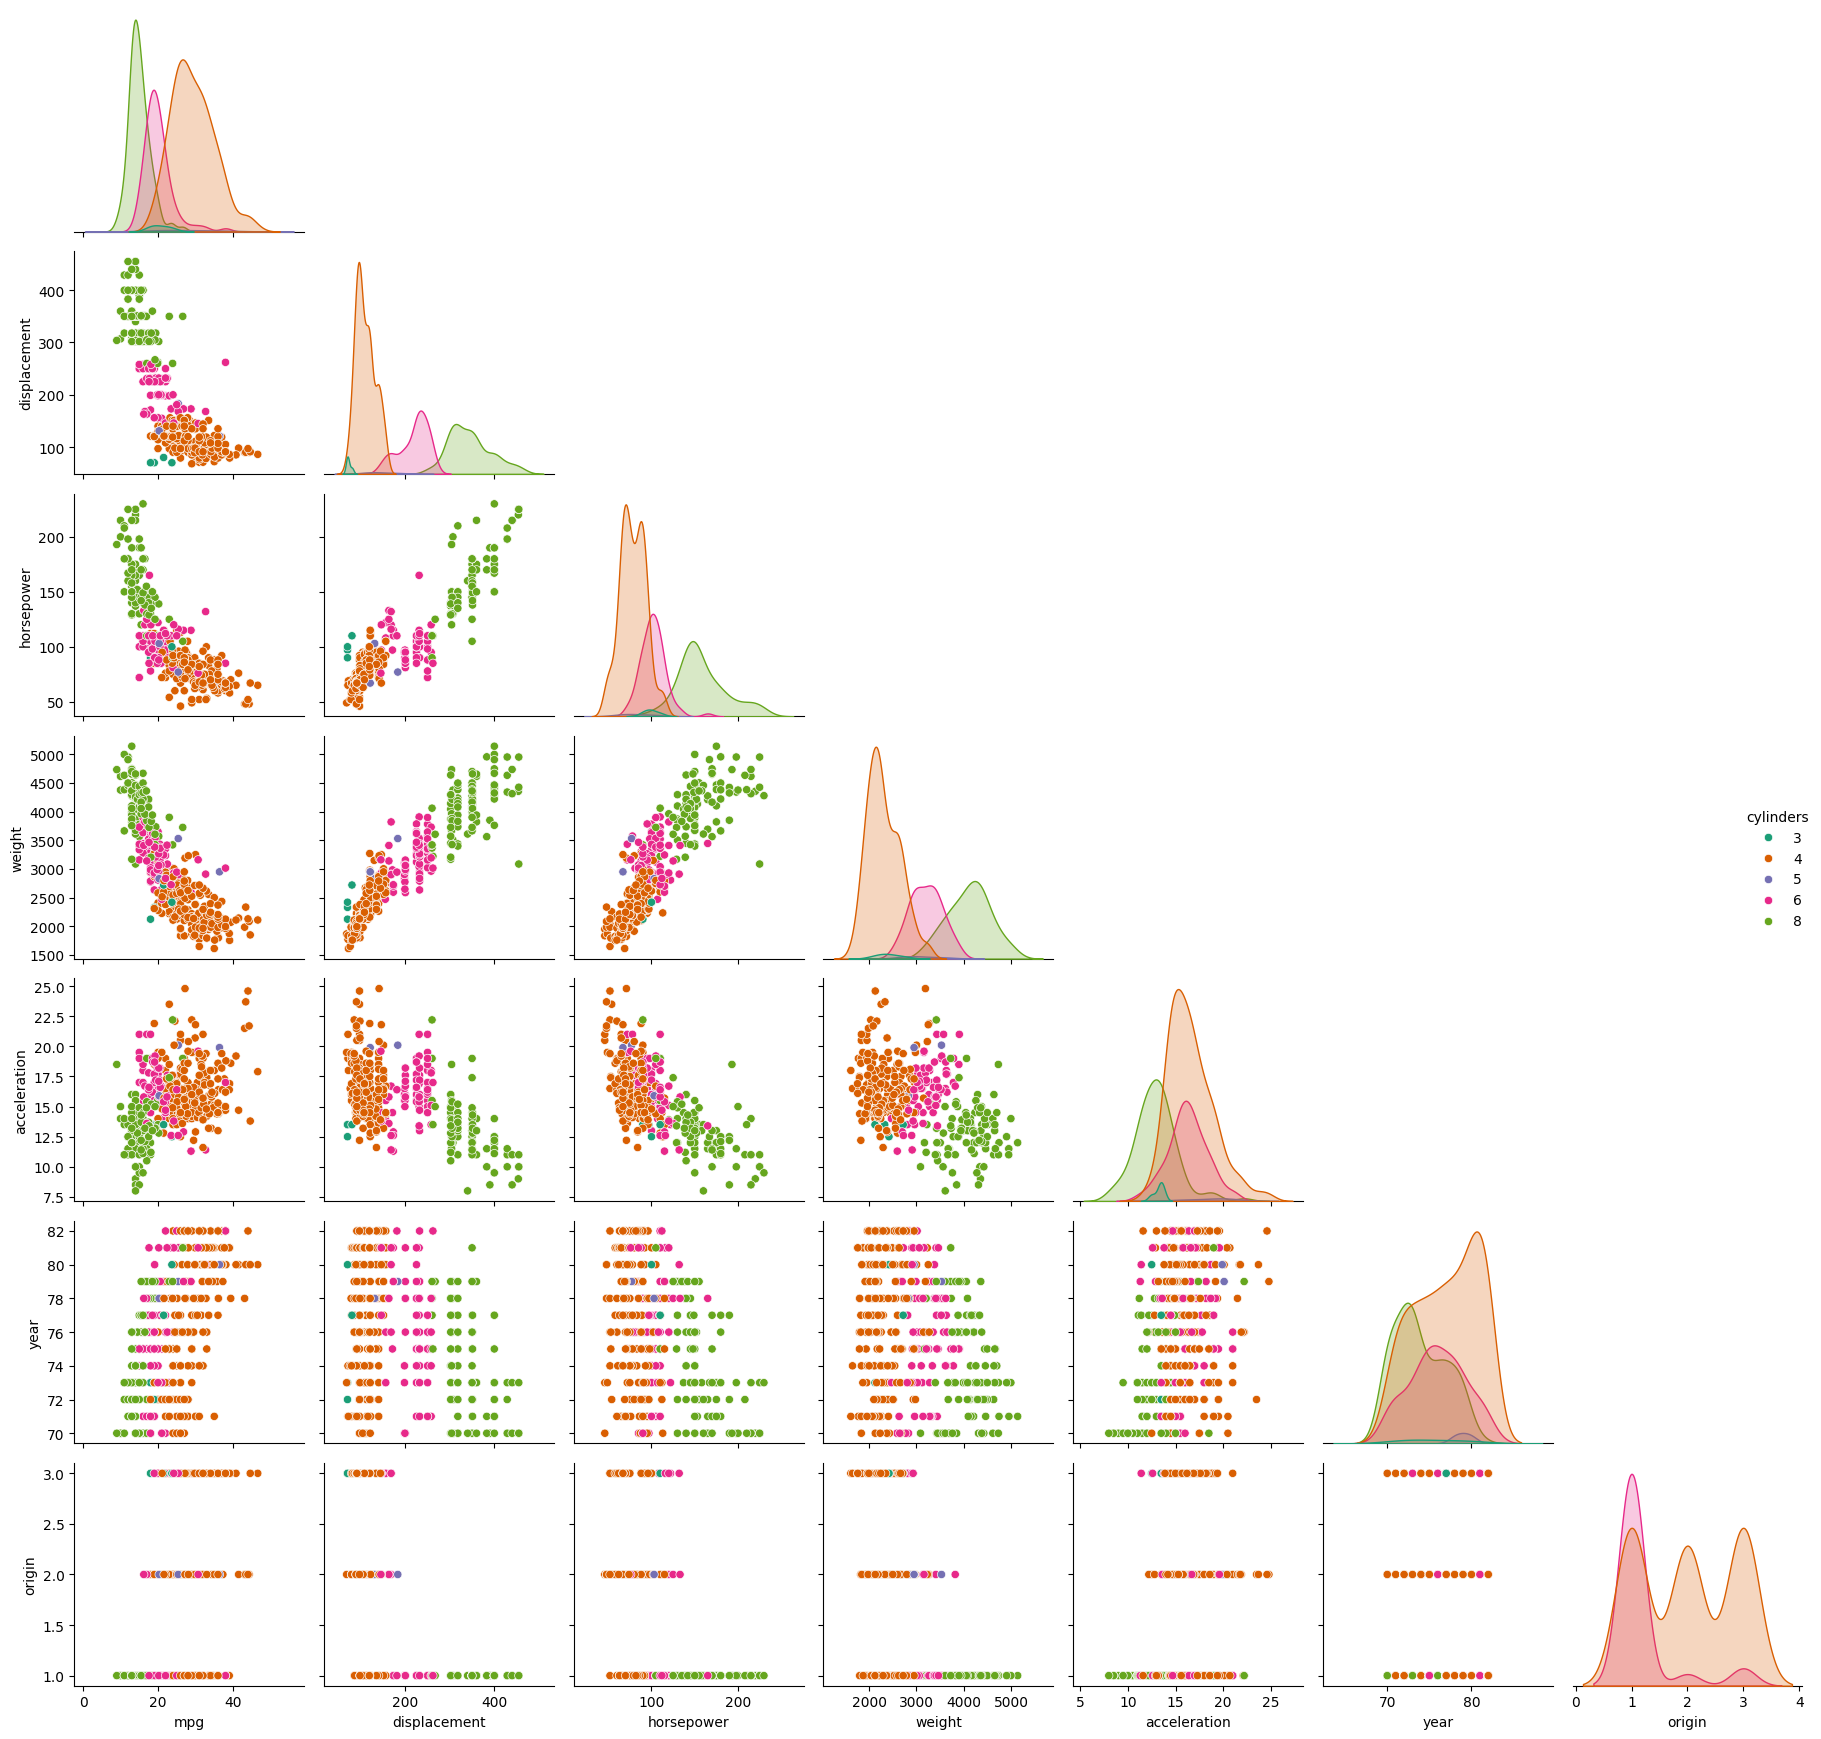

In [ ]:
sns.pairplot(auto, hue="cylinders", corner=True, palette="Dark2")
plt.tight_layout()

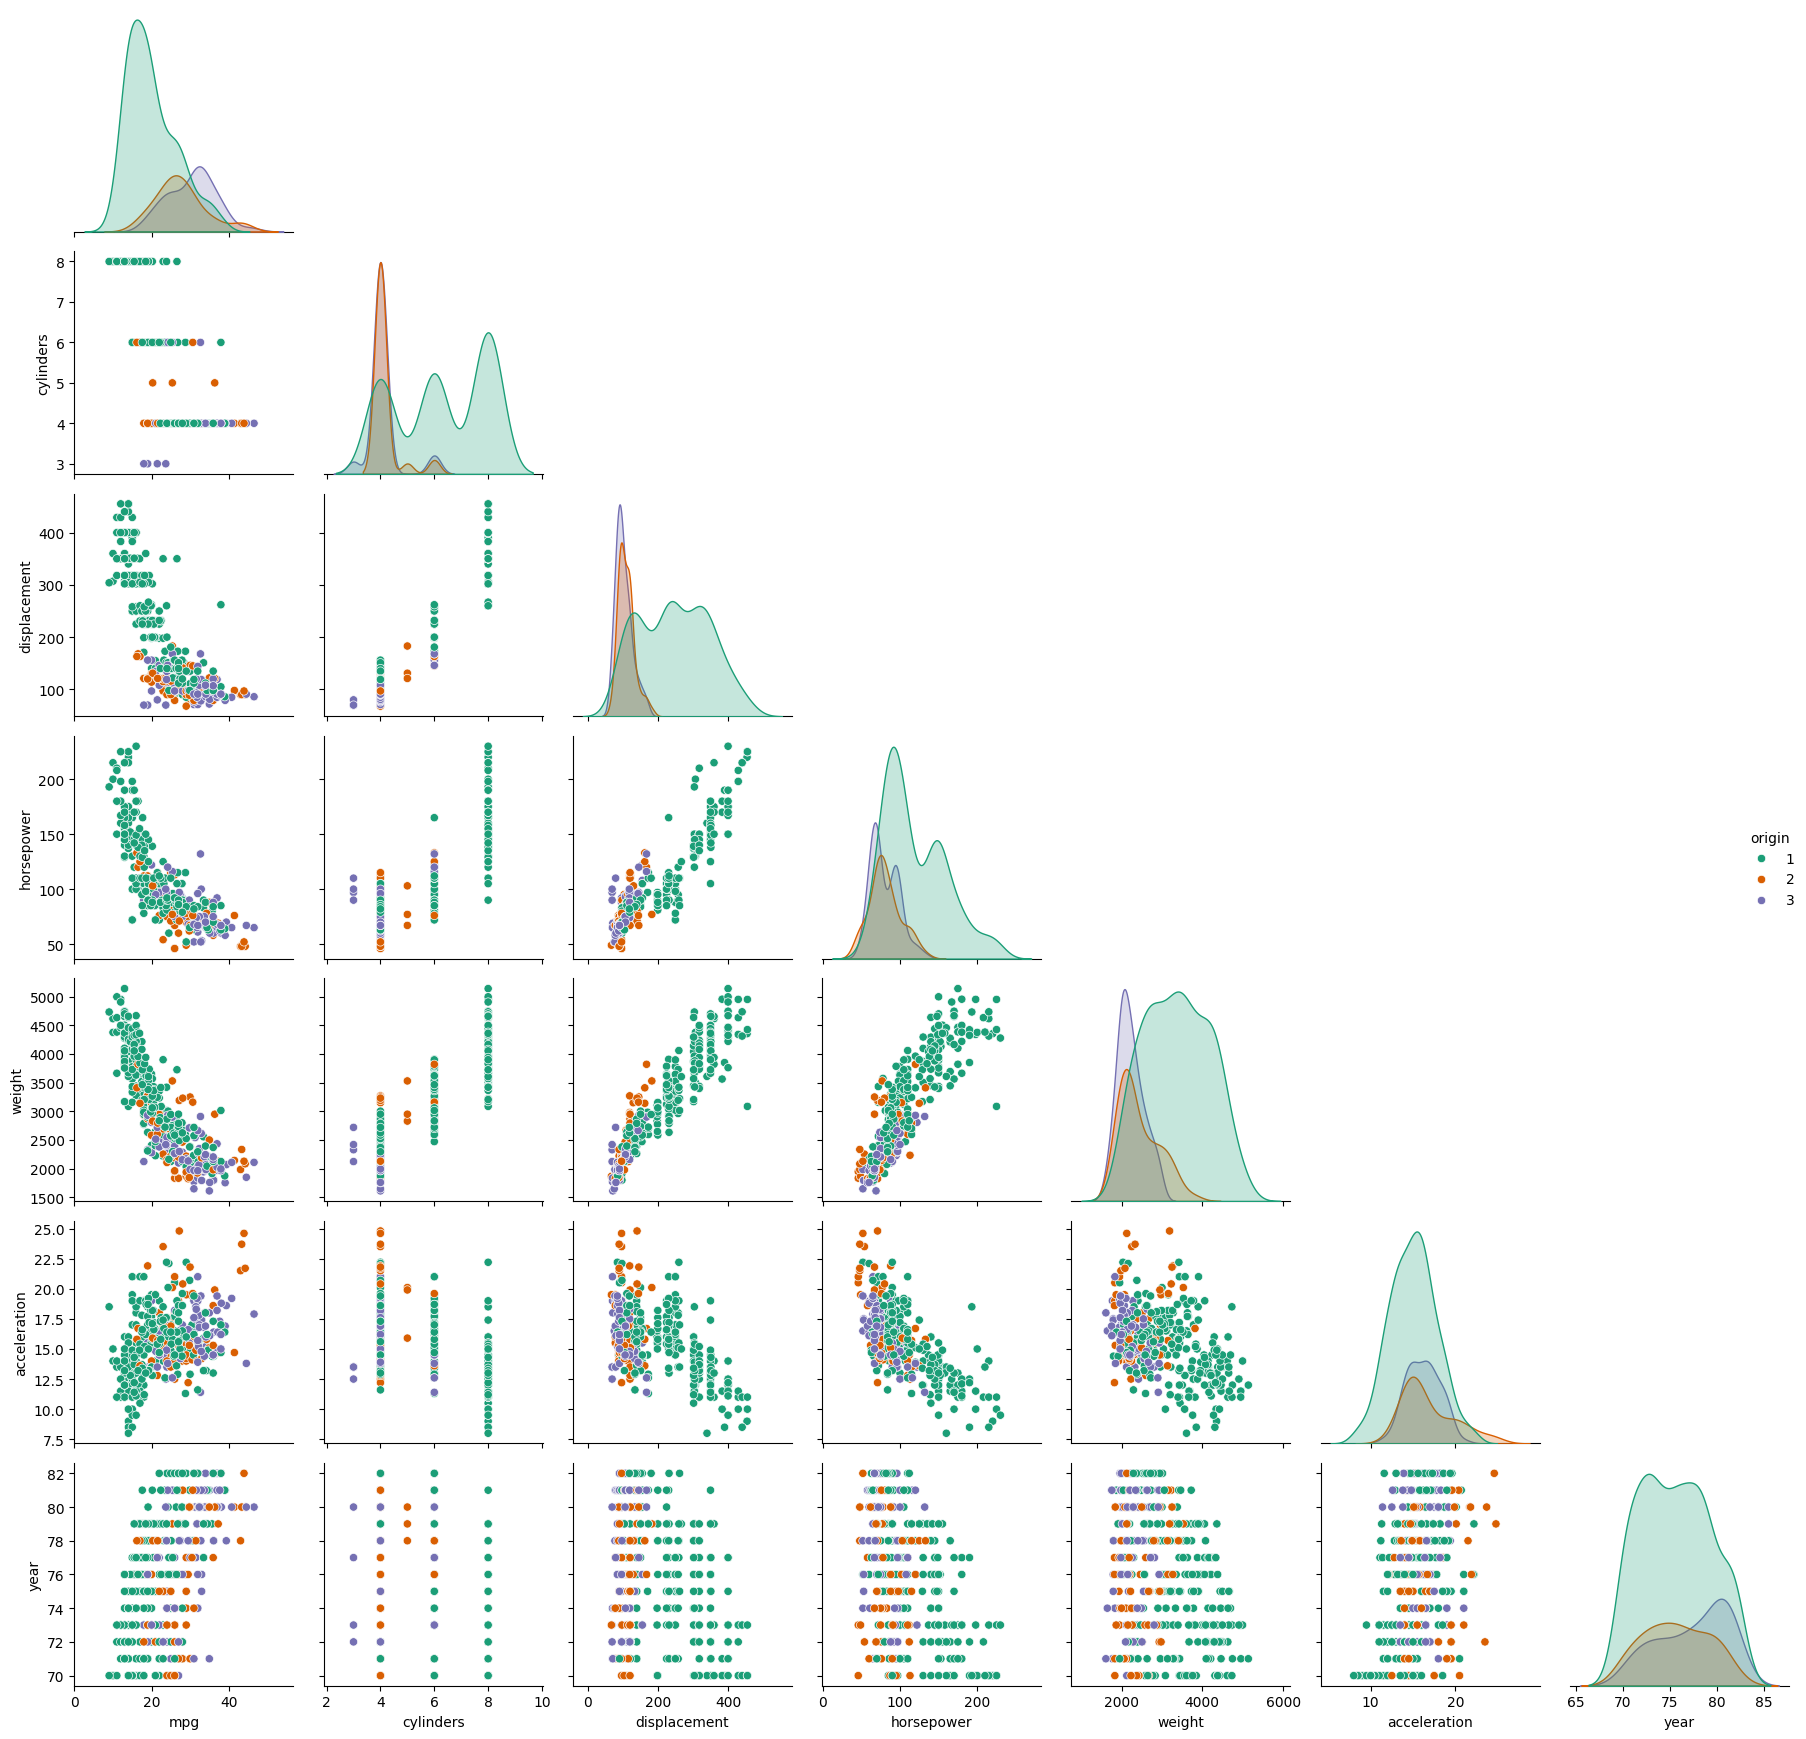

In [ ]:
sns.pairplot(auto, hue="origin", corner=True, palette="Dark2")
plt.tight_layout()

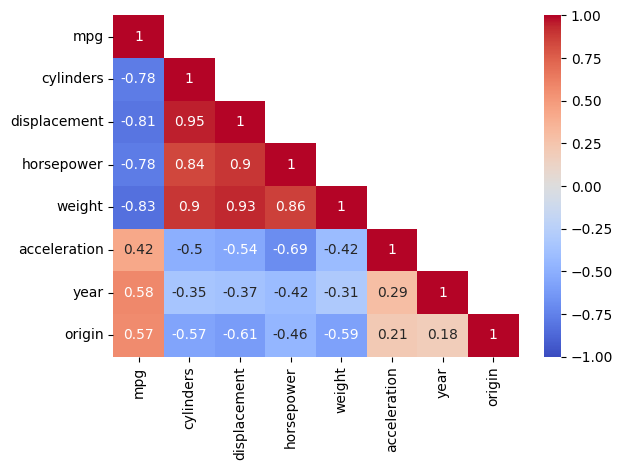

In [ ]:
# correlation matrix could be useful
corr_df = auto.corr(numeric_only=True) # correlation matrix
lt_corr_df = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))  # lower triangle matrix of corr_df
sns.heatmap(lt_corr_df, annot=True, cmap="coolwarm", vmin=-1)
plt.tight_layout()

*   It seems that year has no predictive power on other predictors except mpg.
*   Grouped by origin option provides no additional information.
*   Miles per gallon (mpg) has a strong inverse relationship between these predictors: cylinders, displacement, horsepower and weight. It makes sense because faster (high horsepower, displacement etc.) or heavier cars consume more fuel which results in a poor mileage (low mpg). But weight could also be associated with engine size or some other auto parts such as cylinders and engine displacement.
*   Engine displacement, horsepower and weight are highly correlated.
*   Unsurprisingly, there is a strong correlation between acceleration (lower values of it means better acceleration) and horsepower. Acceleration has also correlated with mpg, cylinders, displacement and weight but they are weaker.

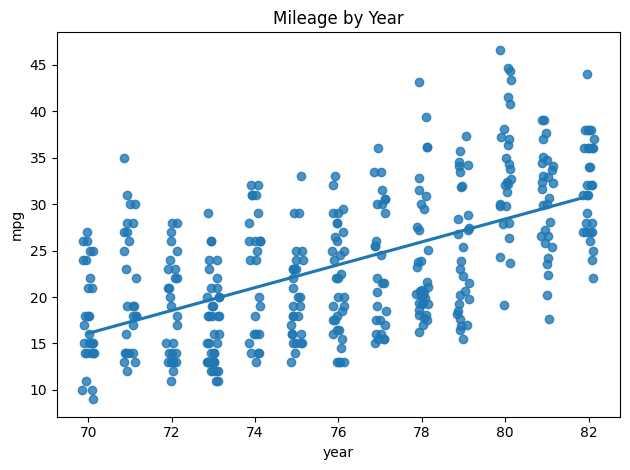

In [ ]:
sns.regplot(data=auto, x="year", y="mpg", x_jitter=.15, ci=None)
plt.title("Mileage by Year")
plt.tight_layout()

<Axes: xlabel='origin', ylabel='mpg'>

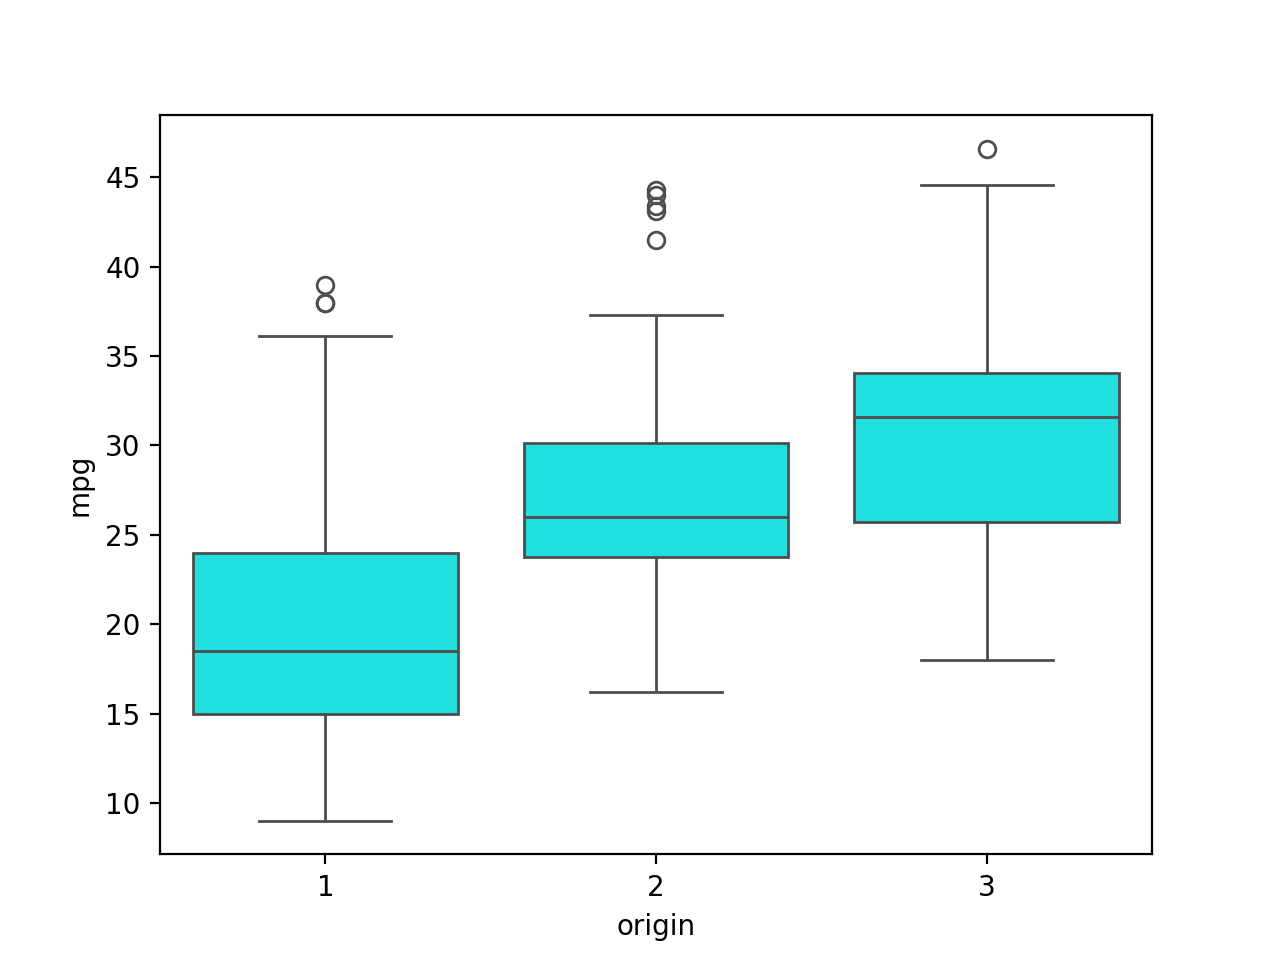

In [ ]:
sns.boxplot(data=auto, y="mpg", x="origin", color="cyan")

<Axes: xlabel='cylinders', ylabel='mpg'>

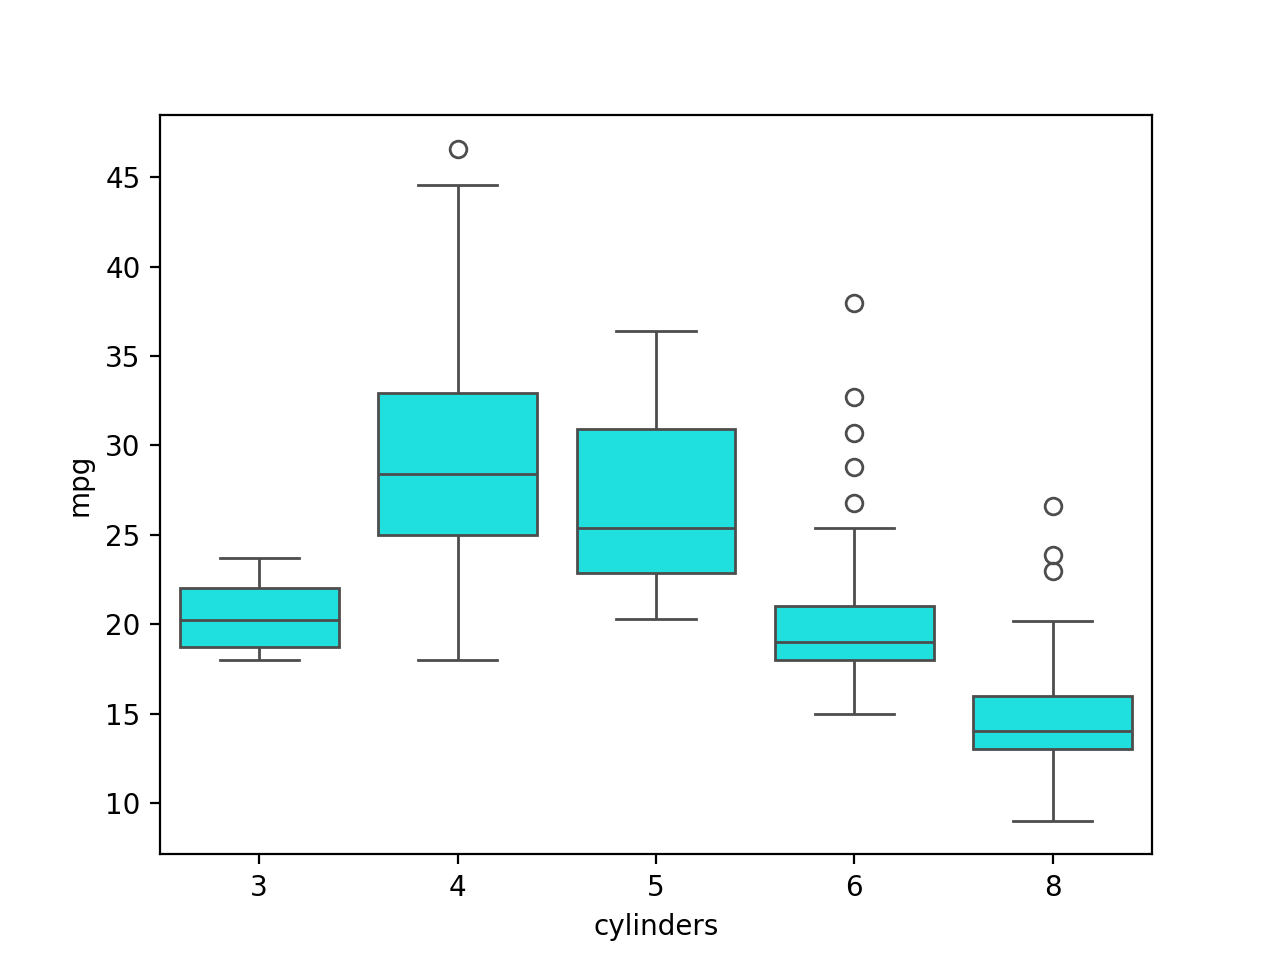

In [ ]:
sns.boxplot(data=auto, y="mpg", x="cylinders", color="cyan")

*   Mileage tends to increase over time, probably due to technology.
*   In general, origin 1 (US) cars has poorer mileage than imported cars.
*   Additionally, number of cylinders seems to have a negative relationship with mpg, except for 3-cylinder cars.



#### f

As mentioned in the part e, predictors other than name column seem to be correlated with mileage but correlation between mpg and acceleration is weaker. Also note that, some predictors are highly correlated with each other and may therefore cause multicollinearity, so they should be use with caution.

## Data Analysis

### 5

In [ ]:
!pip install gapminder
from gapminder import gapminder

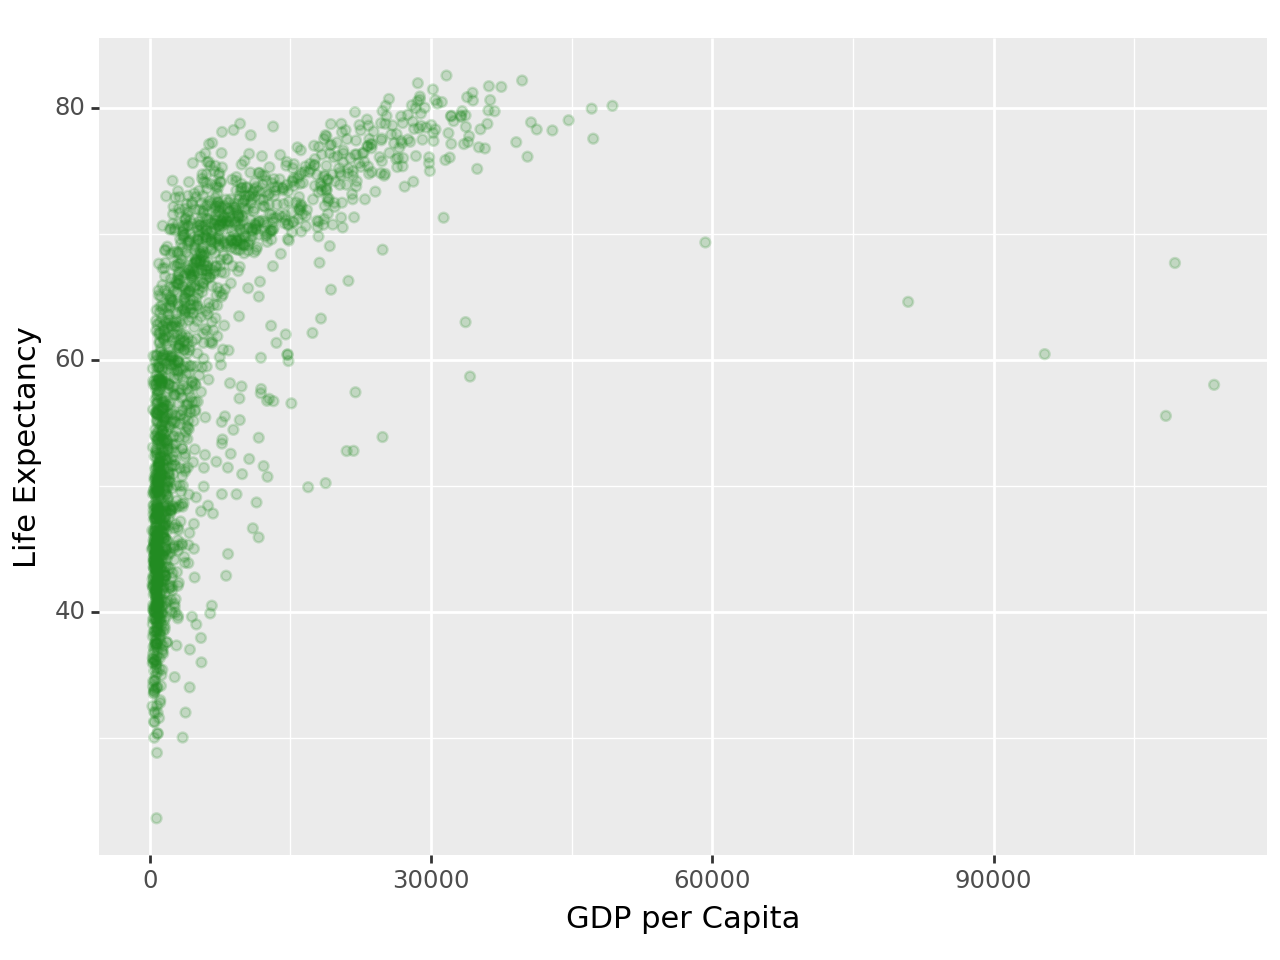

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(gapminder, aes("gdpPercap", "lifeExp")) +
  geom_point(colour = "forestgreen", alpha = .2) +
  labs(x = "GDP per Capita", y = "Life Expectancy")
)

Solely from that plot and setup, there appears to be a curvilinear (rather than linear) correlation between GDP per capita and life expectancy. However, we may have ignored some other factors that could affect life expectancy, such as year and region, and omitting these factors could be misleading. So I grouped the observations by continent for only very recent years, 1997, 2002 and 2007.

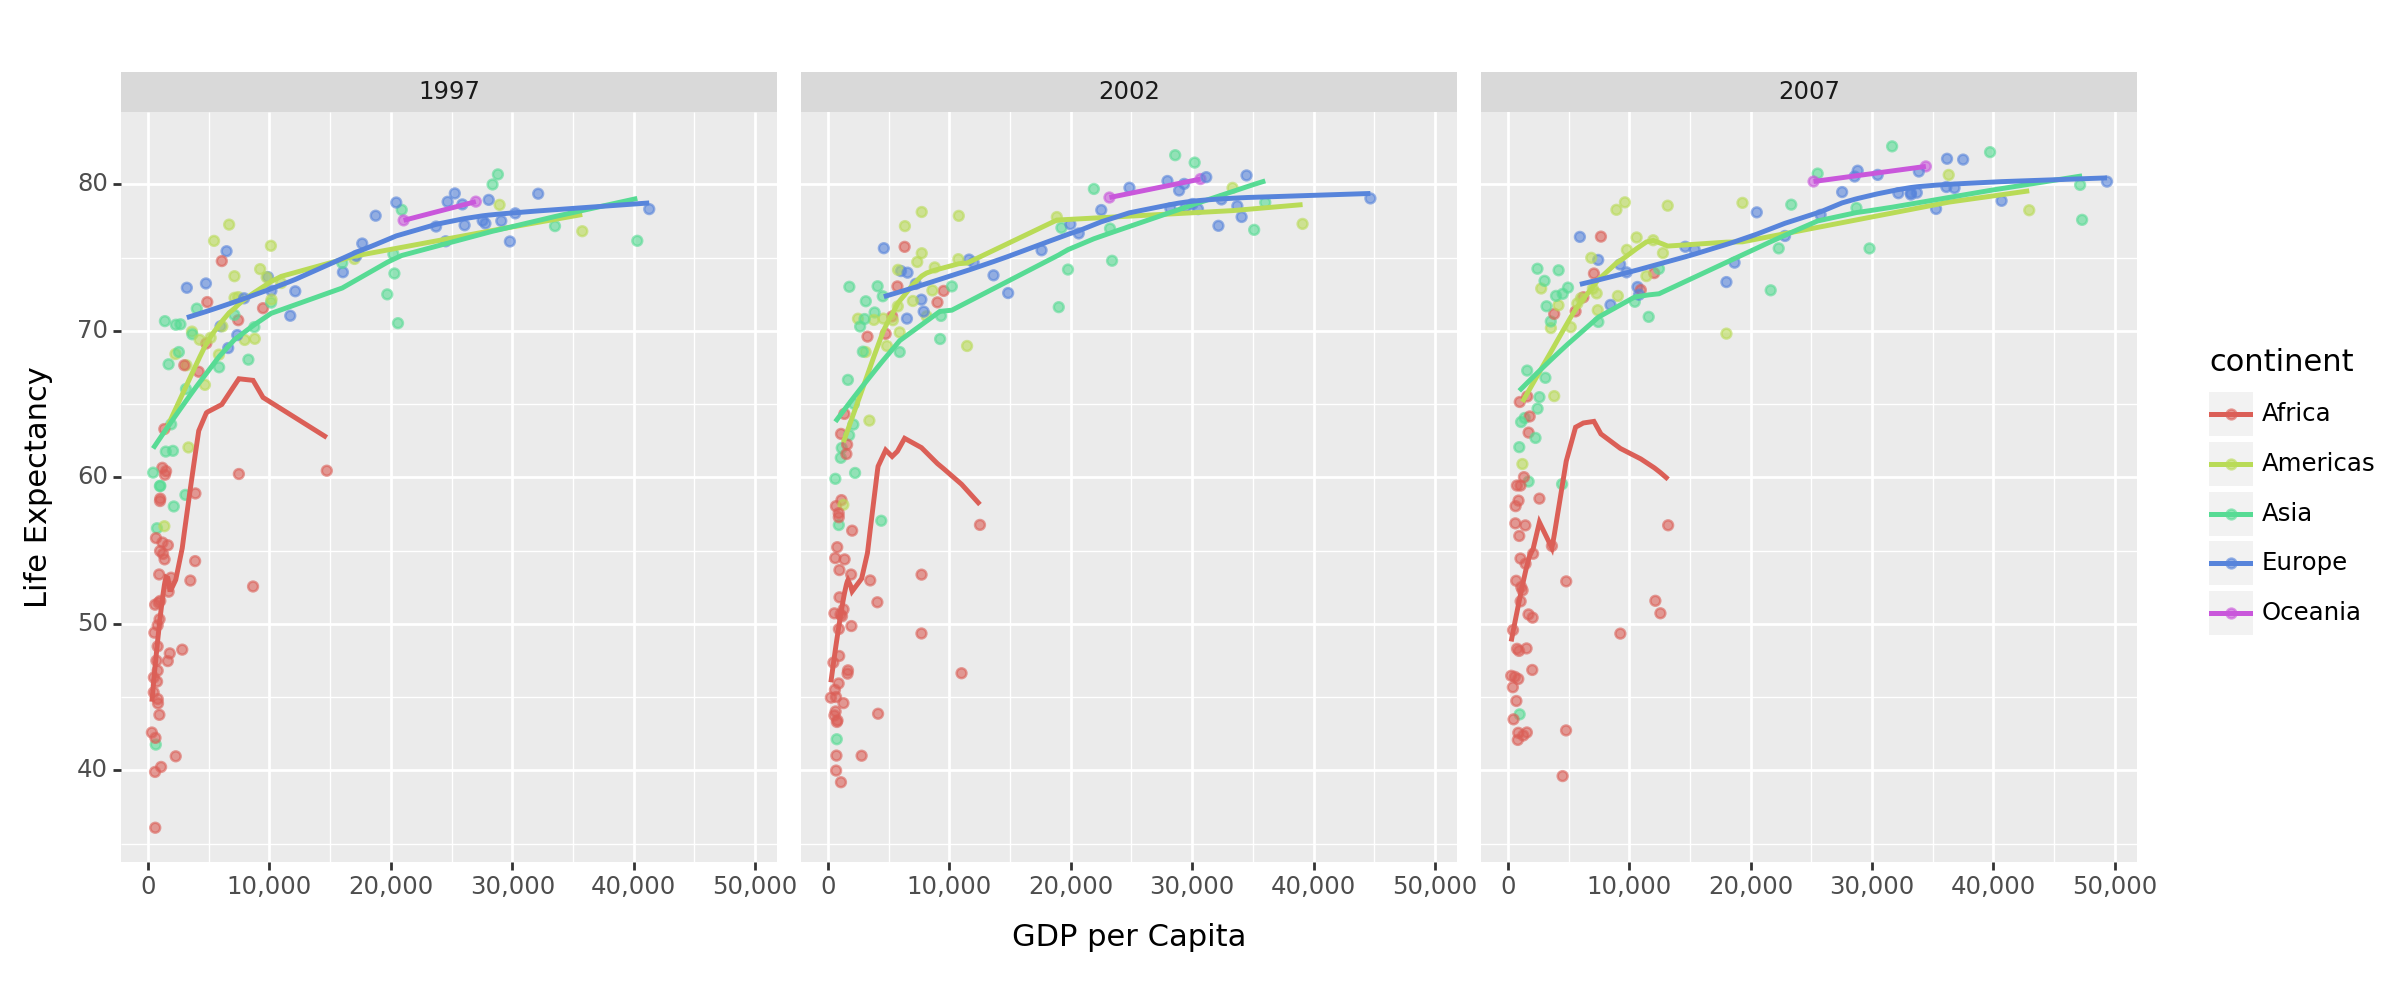

<Figure Size: (1200 x 500)>

In [ ]:
(ggplot(gapminder[gapminder.year.isin([1997,2002,2007])], aes("gdpPercap", "lifeExp", colour = "continent")) +
  geom_point(alpha = .6) +
  geom_smooth(se=False) +
  labs(x = "GDP per Capita", y = "Life Expectancy") +
  facet_wrap("year") +
  scale_x_continuous(labels = comma_format()) +
  theme(figure_size=(12,5))
)

Having grouped the data, we observe that there is a strong correlation between GDP and life expectancy at birth. But for African countries, this relationship looks weaker than the others. One possible explanation to this is, up to a certain level of life expectancy at birth (somewhere around 55), it might be more related to other factors such as diseases, income inequality and security concerns rather than GDP per capita. Also, some African countries have suffered from epidemics such as ebola. If we trim the data at that certain level, or flag some countries as an outlier (e.g: South Africa during HIV/AIDS epidemic), we may observe a similar fitted curve for African countries.

### 6

In [ ]:
titanic = sns.load_dataset("titanic")

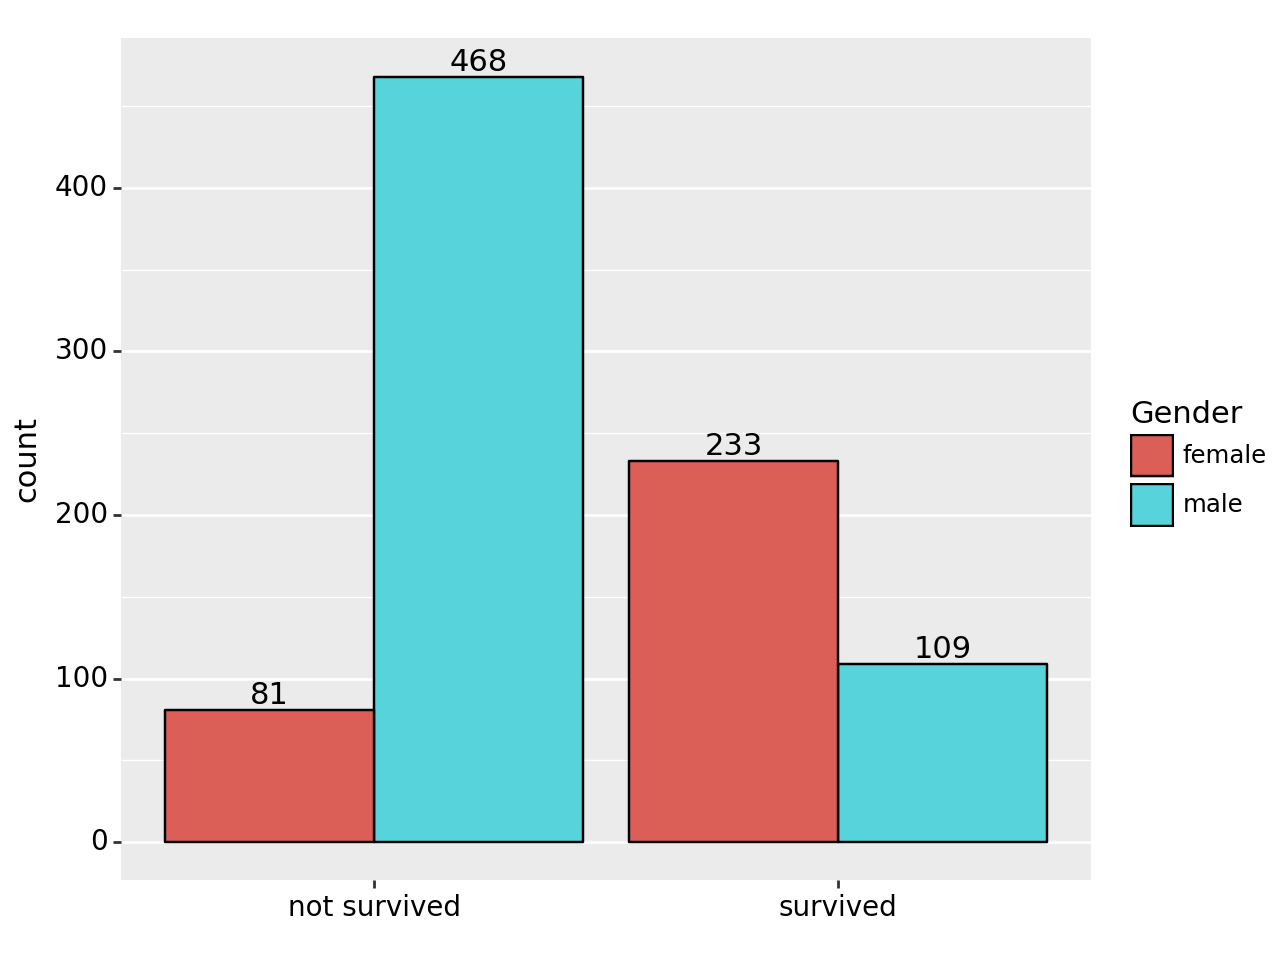

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(titanic, aes(x="survived", fill="sex")) +
  geom_bar(color="black", position="dodge") +
  geom_text(aes(label=after_stat("count")), stat="count", position=position_dodge(width = .9), va="bottom") +
  scale_x_continuous(name="", breaks=[0,1], labels=["not survived", "survived"]) +
  scale_fill_discrete(name="Gender") +
  theme(panel_grid_major_x=element_blank(), panel_grid_minor_x=element_blank(),
        axis_text_x=element_text(color="black", size=10),
        axis_text_y=element_text(color="black", size=10))
)

Women and children first: About 75% of female passengers survived, while less than a fifth of males did.

### 7

In [ ]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [ ]:
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
storage_opt = {'User-Agent': 'Mozilla/5.0'} # somehow I couldn't retrieve the data without using this argument

In [ ]:
# On the new cases and new deaths columns, there are some missing values ​​indicating that no cases or deaths were actually recorded.
# So I replace these values with 0
who_covid = pd.read_csv(url, storage_options=storage_opt).fillna(0)
# I converted date reported column, which was originally stored as an string object, into pandas datetime object.
who_covid["Date_reported"] = pd.to_datetime(who_covid["Date_reported"])

In [ ]:
def ma4(series):
  '''
  calculates 4 period Moving Average
  '''
  ma = []
  for i in range(len(series)):
    last4 = pd.Series(series[i-3:i+1], dtype="float")
    ma += [round(np.mean(last4),2)]
  return ma

In [ ]:
ger_covid = who_covid[who_covid.Country=="Germany"]
ger_covid.loc[:,"New_cases_ma4"] = ma4(ger_covid.loc[:,"New_cases"])
ger_covid_melt = ger_covid[["Date_reported", "New_cases", "New_cases_ma4"]].melt(id_vars="Date_reported", var_name="series", value_name="new cases")

<ipython-input-35-437728b645af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


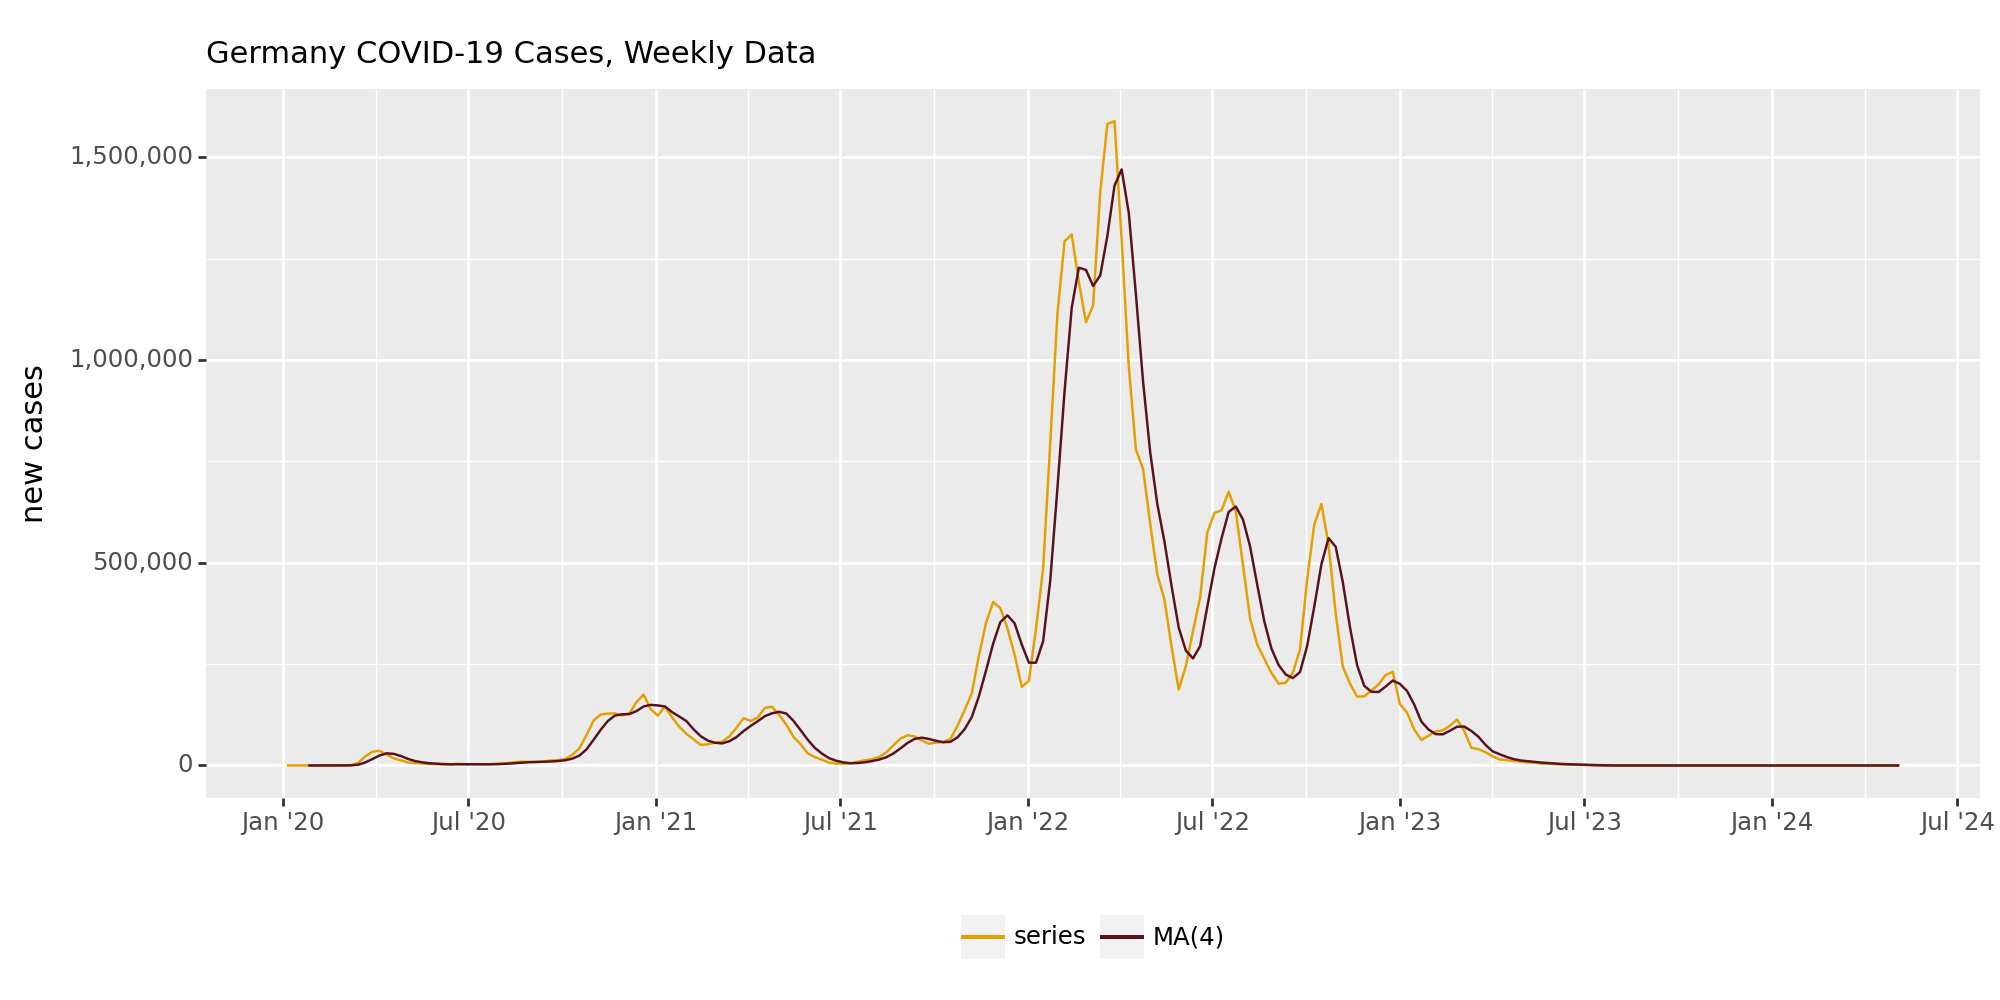

<Figure Size: (1000 x 500)>

In [ ]:
(ggplot(ger_covid_melt, aes(x="Date_reported", y="new cases", color="series")) +
  geom_line() +
  scale_x_datetime(labels = date_format("%b '%y")) +
  scale_y_continuous(labels = comma_format()) +
  labs(subtitle = "Germany COVID-19 Cases, Weekly Data", x = "") +
  theme(figure_size=(10,5), legend_position="bottom", legend_title=element_blank()) +
  scale_color_manual(name = "", labels = ("series", "MA(4)"), values=("#E69F00", "#59121C"))
)